# 왓챠 영화 평점 

In [1]:
import json
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook

In [2]:
import os

In [5]:
import matplotlib.pyplot as plt
from pylab import plot, show, rc
%matplotlib inline

## font 설정하기

In [6]:
font_name = "AppleGothic"
rc('font', family=font_name)

# 크롤링한 영화 평점 불러와서 전처리하기

In [6]:
movie_rating = pd.read_pickle('movie_rating_all.pickle')

In [7]:
movie_rating.shape

(3284921, 8)

In [8]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3284921 entries, 0 to 6
Data columns (total 8 columns):
Unnamed: 0     float64
code           object
main_genre     object
movie_title    object
rating         object
text           object
title          object
username       object
dtypes: float64(1), object(7)
memory usage: 225.6+ MB


In [9]:
movie_rating.head()

,Unnamed: 0,code,main_genre,movie_title,rating,text,title,username
0,NaN,NaN,NaN,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,NaN,jose0
1,NaN,NaN,NaN,말타의 매,5,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,NaN,Eagleeye17
2,NaN,NaN,NaN,말타의 매,4,내 이름은 험프리 보카트.\n탐정이죠.,NaN,sorom
3,NaN,NaN,NaN,말타의 매,4,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,NaN,박진효
4,NaN,NaN,NaN,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,NaN,moviemon94


In [10]:
#null값 파악하기
movie_rating.isnull().sum()

Unnamed: 0     2763947
code           3270997
main_genre     3270997
movie_title      13924
rating           31375
text             13924
title          3270997
username         13924
dtype: int64

## 평점이 null도 있고, 영화 타이틀도 2곳으로 나눠졌다. 장느는 제대로 채워지지도 않았고
## 고쳐보자!!!

In [11]:
movie_rating.dropna(subset=['rating'], inplace=True)

In [12]:
movie_rating.shape

(3253546, 8)

In [13]:
movie_rating.isnull().sum()

Unnamed: 0     2749211
code           3253546
main_genre     3253546
movie_title          0
rating               0
text                 0
title          3253546
username             0
dtype: int64

In [14]:
movie_rating = movie_rating.reset_index(drop=True)

In [15]:
movie_rating.drop(labels=['Unnamed: 0','main_genre','code','title'], axis = 1, inplace=True)

In [18]:
movie_rating.tail()

,movie_title,rating,text,username
3253541,"금지된 섹스, 달콤한 복수",0.5,시간 낭비하기 딱 좋은 영화.,얼그레이
3253542,"금지된 섹스, 달콤한 복수",0.5,이건 무슨 시츄에이션 인지\n하기사 이런 영화를 본것이 죄라면 죄지\n그래도 한마디...,헐리우드영화인생24년
3253543,"금지된 섹스, 달콤한 복수",1,도대체 이런 영화는 왜 만드는 건지...,백선우
3253544,"금지된 섹스, 달콤한 복수",1,-----,김용진
3253545,"금지된 섹스, 달콤한 복수",0.5,내 1시간 14분...,조창현


### 영화 장르도 넣고 싶다.

In [19]:
#왓챠의 영화 리스트 크롤링 결과를 가지고 온다.
movie_list = pd.read_csv('왓챠_영화리스트.csv')

In [20]:
movie_list.drop(labels=['Unnamed: 0','code'], axis = 1, inplace=True)

In [21]:
movie_list = movie_list.rename( columns = {'title':'movie_title'})

In [22]:
movie_list.head()

,main_genre,movie_title
0,액션,앤트맨과 와스프
1,액션,마녀
2,코미디,탐정: 리턴즈
3,범죄,오션스8
4,액션,쥬라기 월드: 폴른 킹덤


In [23]:
#두 데이터 머지
df_m_rating = pd.merge(movie_rating, movie_list, how='left', on='movie_title')

In [27]:
df_m_rating.describe()

,movie_title,rating,text,username,main_genre
count,3658134,3658134.0,3658134,3658134,3647684
unique,6557,10.0,3125224,96056,16
top,미녀와 야수,4.0,.,IMDb 평점,드라마
freq,52500,858289.0,7661,4018,1037569


In [29]:
df_m_rating.tail()

,movie_title,rating,text,username,main_genre
3658129,"금지된 섹스, 달콤한 복수",0.5,시간 낭비하기 딱 좋은 영화.,얼그레이,로맨스/멜로
3658130,"금지된 섹스, 달콤한 복수",0.5,이건 무슨 시츄에이션 인지\n하기사 이런 영화를 본것이 죄라면 죄지\n그래도 한마디...,헐리우드영화인생24년,로맨스/멜로
3658131,"금지된 섹스, 달콤한 복수",1,도대체 이런 영화는 왜 만드는 건지...,백선우,로맨스/멜로
3658132,"금지된 섹스, 달콤한 복수",1,-----,김용진,로맨스/멜로
3658133,"금지된 섹스, 달콤한 복수",0.5,내 1시간 14분...,조창현,로맨스/멜로


In [30]:
#제대로 들어갔는지 검증
df_m_rating[df_m_rating['movie_title'].str.contains('앤트맨',regex = False, na = False)].head()

,movie_title,rating,text,username,main_genre
800525,앤트맨과 와스프,4,앤트맨과 와스프라고 하니 군생활 시절이 떠오릅니다.\n훈련소에서 갖는 식사란 반찬이...,의식의흐름,액션
800526,앤트맨과 와스프,3.5,개미는 뚠뚠🐜🐜 오늘도 열일🐜🐜\n부제: 엔트맨과 세얼간이ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ\n아...,kjhhhhh,액션
800527,앤트맨과 와스프,3.5,토마스에 이어서 이제 헬로키티 덕후까지 섭렵하려는 마블👍🥇✨~ 앤트맨은 사랑입니당!...,이종욱,액션
800528,앤트맨과 와스프,4,"새로움보단 익숙함에 주력하기, 시종일관 내내 무난하게 유쾌하다.",김병우,액션
800529,앤트맨과 와스프,3,앤트맨 시리즈는 마블이 사용하는 쉼표.,이동진 평론가,액션


In [31]:
df_m_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658134 entries, 0 to 3658133
Data columns (total 5 columns):
movie_title    object
rating         object
text           object
username       object
main_genre     object
dtypes: object(5)
memory usage: 167.5+ MB


In [32]:
df_m_rating['rating'] = df_m_rating['rating'].astype('float')

In [33]:
df_m_rating.groupby('main_genre')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
main_genre,,,,,,,,
SF,215534.0,3.514777,1.109599,0.5,3.0,3.5,4.5,5.0
가족,30126.0,3.713636,1.017850,0.5,3.0,4.0,4.5,5.0
공포,110059.0,3.431369,0.906508,0.5,3.0,3.5,4.0,5.0
다큐멘터리,14028.0,3.616410,1.063698,0.5,3.0,4.0,4.5,5.0
드라마,1037569.0,3.711571,0.960407,0.5,3.0,4.0,4.5,5.0
로맨스/멜로,267678.0,3.603737,1.078451,0.5,3.0,4.0,4.5,5.0
로맨틱 코미디,65632.0,3.415034,1.058252,0.5,3.0,3.5,4.0,5.0
미상,15022.0,3.823126,1.145861,0.5,3.0,4.0,5.0,5.0
범죄,283862.0,3.445657,1.002499,0.5,3.0,3.5,4.0,5.0


    - 가족, 로멘스, 드라마, 애니메이션 등 가족들이 같이 볼 수 있는건 높은 평점
    - 공포, 로맨틱 코미디, 코미디, 전쟁, 액션등은 평가하면서 보나??? 평균이 상대적으로 낮다

# 분석할 영화 수는?

In [34]:
len(movie_rating['movie_title'].unique())

6557

### 별점을 어떻게 주고 있는가?

In [35]:
import collections

In [36]:
rating = movie_rating[movie_rating['rating'].notnull()]['rating']

In [37]:
rh = dict(collections.Counter(rating))

<BarContainer object of 10 artists>

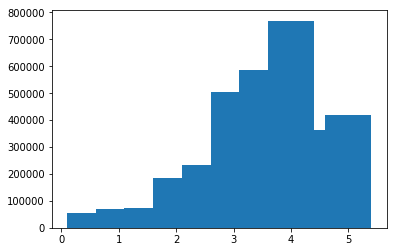

In [38]:
plt.bar(rh.keys(), rh.values())

### 도배하는 사람이 있나?

In [39]:
rh = dict(collections.Counter(movie_rating[movie_rating['username'].notnull()]['username']))

In [40]:
df_m = pd.DataFrame.from_dict(rh,orient='index')

In [41]:
df_m.columns = ['count']

In [304]:
df_m.sort_values(by='count', ascending=False).head(10)

,count
0,3624
1,2711
2,2612
3,2426
4,2124
5,1912
6,1891
7,1877
8,1768
9,1764


In [42]:
df_m.describe()

,count
count,96056.000000
mean,33.871346
std,86.901925
min,1.000000
25%,2.000000
50%,7.000000
75%,29.000000
max,3624.000000


50%가 7개 이내의 댓글을 기록하고 있다

In [56]:
df_m.sort_values('count', ascending=False, inplace=True)

In [57]:
df_m.reset_index(drop=True, inplace=True)

In [58]:
df_m.head()

,count
0,3624
1,2711
2,2612
3,2426
4,2124


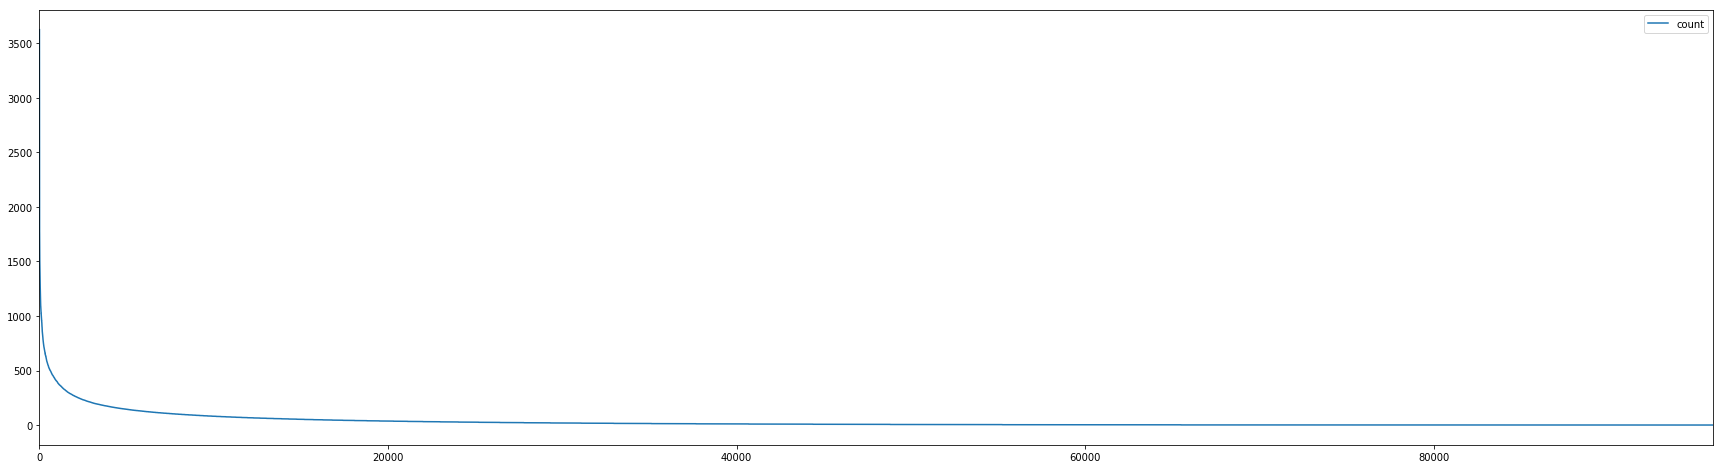

In [75]:
#댓글을 사람순으로 볼때 어떻게 쓰나?

df_m.plot(figsize=(30,8))

plt.show()

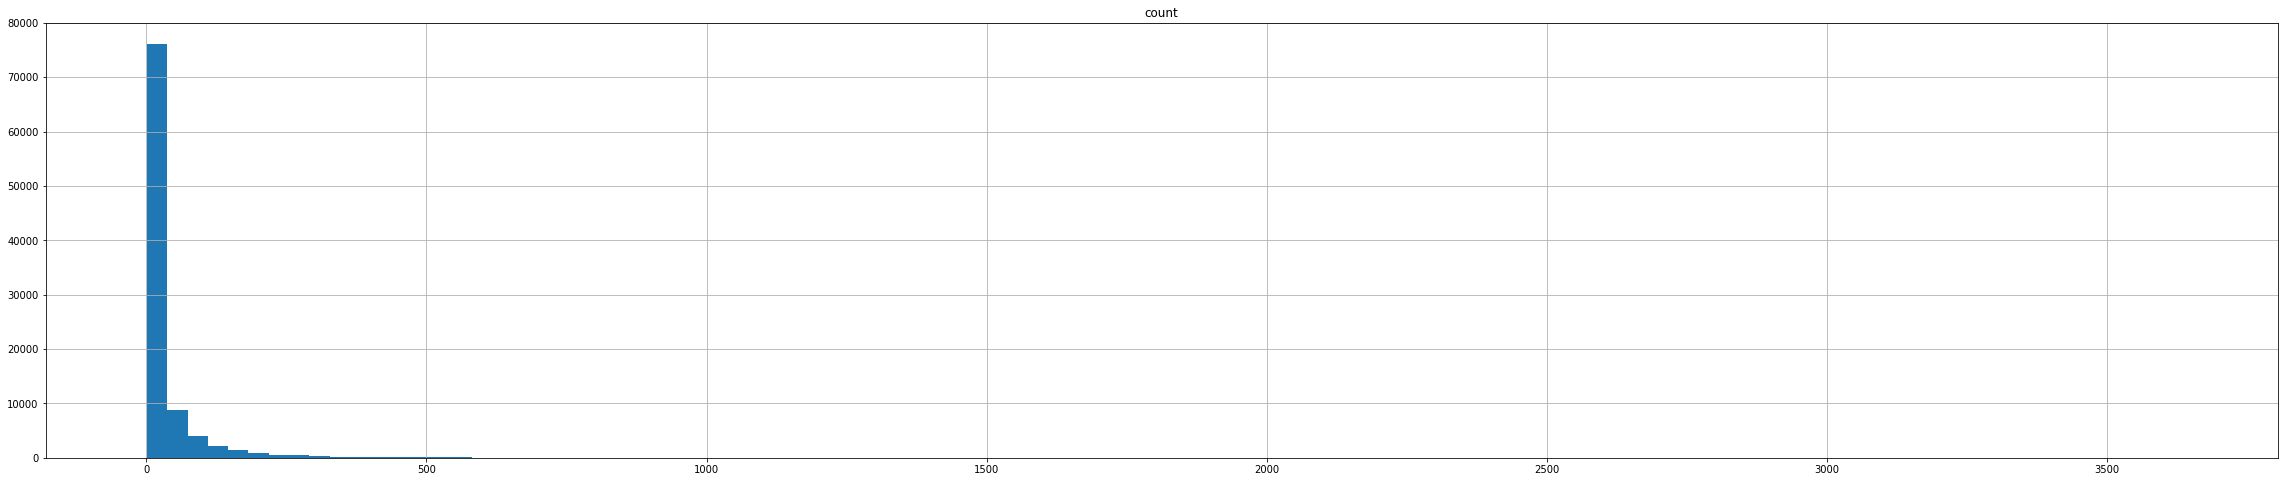

In [74]:
#히스토그램으로 볼때 30이내가 압도적
df_m.sort_values('count', ascending=False).hist(bins = 100, figsize=(40,8))
plt.show()

In [61]:
#100개 이상 쓴 사람의 수는?
df_m[df_m['count'] >= 1000].count()

count    110
dtype: int64

In [78]:
movie_rating.tail()

,movie_title,rating,text,username
3253541,"금지된 섹스, 달콤한 복수",0.5,시간 낭비하기 딱 좋은 영화.,얼그레이
3253542,"금지된 섹스, 달콤한 복수",0.5,이건 무슨 시츄에이션 인지\n하기사 이런 영화를 본것이 죄라면 죄지\n그래도 한마디...,헐리우드영화인생24년
3253543,"금지된 섹스, 달콤한 복수",1,도대체 이런 영화는 왜 만드는 건지...,백선우
3253544,"금지된 섹스, 달콤한 복수",1,-----,김용진
3253545,"금지된 섹스, 달콤한 복수",0.5,내 1시간 14분...,조창현


In [83]:
t = movie_rating[movie_rating['movie_title'] == '앤트맨과 와스프']['rating']

In [84]:
t.describe()

count     5398.0
unique      10.0
top          3.5
freq      1671.0
Name: rating, dtype: float64

In [89]:
t.values

array([4.0, 3.5, 3.5, ..., 4.0, 3.5, 2.5], dtype=object)

# 텍스트 마이닝을 시작해보자

<div> <img src = http://ahnsamo.kr/files/attach/images/545804/604/250/001/e02c5b37c4ffbec9ec0f64c4bab24633.jpg> </div>

# 1. 한글만 취한다.

In [90]:
import re

In [98]:
#우리가 해야할 대상
df_m_rating.head()

,movie_title,rating,text,username,main_genre
0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄
1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄
2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄
3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄
4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄


In [99]:
df_m_rating.shape

(3658134, 5)

In [100]:
df_m_rating.drop_duplicates(inplace=True)

In [108]:
df_m_rating.shape

(3483604, 5)

In [109]:
movie_rating = df_m_rating.reset_index(drop=True)

In [110]:
movie_rating.head()

,movie_title,rating,text,username,main_genre
0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄
1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄
2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄
3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄
4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄


In [111]:
movie_rating.shape

(3483604, 5)

In [112]:
hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
hangulresult = [hangul.sub('',t) for t in movie_rating['text'].astype(str)]


#추출가능
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
#RE_EMOJI.sub(r'', text)
text = [RE_EMOJI.sub('',t) for t in text  if  t  != ""]

In [113]:
#하나 이상의 공백은 하나로 처리
hangulresult = [re.sub(' +',' ',t) for t in hangulresult]

In [114]:
#좌우공백 제거
hangulresult = [t.strip() for t in hangulresult]

In [119]:
hangulresult[25045:25065]

['잊을수 없는 명대사 명장면이 많았던 임팩트 있는 영화',
 '완벽히 흐르는 대사와 내용러닝타임 안에서 보여줄 수 있는 가장 모범적인 흐름이라 생각한다',
 '세월이 지나고 나니 마음속 평가가 박해지는 영화',
 '이 이후에 이런 캐스팅 연출 시나리오가 또나올까',
 '그래도 친구 아이가',
 '청소년 관람불가 였지만 그 당시 남자라면 연령불문하고챙겨본 영화였고 그때의 유행어가 지금까지도 회자되고 있다비록 케이블에서는 영화를 시체처럼 편집하고 있지만',
 '인생영화',
 '한 십수년 뒤에 한국 느와르 영화의 역사를 서술한다면 가장 상징적인 영화로 기록되지 않을까 텍스트만이 아니라 컨텍스트의 측면에서도 모두',
 '곽경택의 로또',
 '의리',
 '참 많은 얘깃거리룰 만들었음은 확실하다 곽경택 감독의 대표작',
 '투박하고 평범한 연출에 비해 년대 초반 이 영화가 남긴 수많은 명대사들과 명장면만으로도',
 '대부에 비견할만한 한국판 느와르 걸작',
 '나이 먹고 다시 보니 또 다른 느낌',
 '친구에 대한 동경이 질투가 되고 돌이키기 어려운곳 까지 와버렸다 따라잡기 위해 선택한 쉬운 방법은 대부분 정도는 아닌 듯',
 '고마해라 마이 뭇다 아이가',
 '친구야 같이 가자 눈물을 닦고 가자',
 '유행어가 아직까지 여기저기서 쓰이는거보면 대단하긴했던영화지 난 솔직히 그냥그랬음',
 '개봉 첫날 봤다 너무 잔인해서 그날 저녁을 못 먹었다',
 '케미의 시작은 조오련과 거북이부터']

In [115]:
len(hangulresult)

3483604

In [120]:
movie_rating['new_text'] = hangulresult

In [121]:
movie_rating.head()

,movie_title,rating,text,username,main_genre,new_text
0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄,필름 누아르의 시작은 관객에 대한 배반이었다탐정 주인공 샘 스페이드 그 남자 흉폭하...
1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링 과연 ...
2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄,내 이름은 험프리 보카트탐정이죠
3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...
4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄,고전적 가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요


In [124]:
index = [ True if len(t) > 10 else False for t in movie_rating['new_text'] ]

In [125]:
movie_rating = movie_rating.loc[index]

In [126]:
movie_rating.shape

(2965505, 6)

In [127]:
movie_rating.head()

,movie_title,rating,text,username,main_genre,new_text
0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄,필름 누아르의 시작은 관객에 대한 배반이었다탐정 주인공 샘 스페이드 그 남자 흉폭하...
1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링 과연 ...
2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄,내 이름은 험프리 보카트탐정이죠
3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...
4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄,고전적 가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요


# L-R tokener 

In [129]:
#pip3 install gensim
#pip3 install tqdm -> for문 progressbar 나타내기

import os
import logging

import itertools
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.font_manager as fm
import multiprocessing
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

from collections import Counter

from tqdm import tqdm_notebook
from gensim.models.doc2vec import LabeledSentence

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec

from sklearn.manifold import TSNE
from matplotlib import font_manager, rc

from sklearn.metrics.pairwise import cosine_similarity

from soynlp.noun import LRNounExtractor

In [131]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [132]:
noun_extractor = LRNounExtractor()

used default noun predictor; Sejong corpus predictor
used noun_predictor_sejong
All 2398 r features was loaded


In [133]:
movie_rating.head()

,movie_title,rating,text,username,main_genre,new_text
0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄,필름 누아르의 시작은 관객에 대한 배반이었다탐정 주인공 샘 스페이드 그 남자 흉폭하...
1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링 과연 ...
2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄,내 이름은 험프리 보카트탐정이죠
3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...
4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄,고전적 가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요


In [134]:
movie_rating = movie_rating.reset_index()

In [135]:
movie_rating.head()

,index,movie_title,rating,text,username,main_genre,new_text
0,0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄,필름 누아르의 시작은 관객에 대한 배반이었다탐정 주인공 샘 스페이드 그 남자 흉폭하...
1,1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링 과연 ...
2,2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄,내 이름은 험프리 보카트탐정이죠
3,3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...
4,4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄,고전적 가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요


In [136]:
nouns = noun_extractor.train_extract(movie_rating['new_text'], minimum_noun_score=0.5, min_count=10)

scanning completed
(L,R) has (669730, 395284) tokens
building lr-graph completed

In [137]:
type(nouns)

dict

In [138]:
len(nouns.keys())

103795

In [139]:
nouns

{'새터': NounScore(frequency=12, score=0.999707, known_r_ratio=0.1),
 '엮임': NounScore(frequency=15, score=0.9287405714285715, known_r_ratio=0.7),
 '리틀': NounScore(frequency=1349, score=0.7106881803921571, known_r_ratio=0.5368421052631579),
 '파해': NounScore(frequency=71, score=0.91341159375, known_r_ratio=0.5),
 '맥동': NounScore(frequency=13, score=0.9516526153846153, known_r_ratio=1.0),
 '대극': NounScore(frequency=30, score=0.9995746999999999, known_r_ratio=0.3333333333333333),
 '애바': NounScore(frequency=18, score=0.87547975, known_r_ratio=0.4444444444444444),
 '사신': NounScore(frequency=102, score=0.689696090909091, known_r_ratio=0.7746478873239436),
 '쏠쏠': NounScore(frequency=1699, score=0.9920201378923764, known_r_ratio=0.7623931623931623),
 '인방': NounScore(frequency=193, score=0.8278840530973451, known_r_ratio=0.8625954198473282),
 '쓰긴': NounScore(frequency=50, score=0.98070225, known_r_ratio=0.8888888888888888),
 '앙상': NounScore(frequency=1287, score=0.9978272601156072, known_r_ratio=0

In [140]:

nouns2 = {}


#rscore와 frequency 기준으로 잘라본다.
#rscore가 작다는 것은 조사일 가능성이 높다
for w in nouns:
    if list(nouns[w])[2] > 0.8 and list(nouns[w])[0] > 100:
        nouns2[w] = list(nouns[w])[0]




In [141]:
len(nouns2.keys())

6762

In [142]:
nouns2.items()

dict_items([('인방', 193), ('종구', 352), ('꽃들', 213), ('초석', 391), ('장첸', 393), ('년뒤', 286), ('내년', 604), ('개들', 719), ('컨셉', 2436), ('창백', 176), ('의자', 819), ('컬킨', 146), ('상현', 272), ('경험', 8426), ('시온', 252), ('연희', 652), ('험난', 431), ('고약', 141), ('우아', 3980), ('바위', 542), ('코너', 1015), ('현빈', 2400), ('그윽', 140), ('과함', 304), ('응당', 157), ('일출', 119), ('너머', 1610), ('조커', 3883), ('비릿', 229), ('서연', 164), ('짓들', 117), ('각박', 420), ('현명', 1034), ('극강', 422), ('형님', 1552), ('시력', 170), ('편승', 293), ('밀정', 859), ('안쪽', 122), ('무어', 1089), ('심장', 7664), ('덜도', 565), ('무렵', 485), ('괴물', 10474), ('방패', 356), ('든든', 570), ('위치', 2475), ('리지', 169), ('괴담', 180), ('화분', 297), ('횟수', 115), ('깜깜', 192), ('불길', 375), ('명분', 1026), ('공유', 5399), ('유능', 262), ('맥락', 1776), ('후광', 253), ('백프', 175), ('궁전', 124), ('킬빌', 551), ('총칼', 102), ('선택', 23012), ('물체', 120), ('반열', 380), ('오즈', 509), ('발끝', 392), ('괴상', 679), ('왠만', 840), ('색계', 164), ('덕택', 105), ('역할', 12082), ('반듯', 164), ('핸콕', 127), ('접촉'

S={}

for w in nouns2:m
    freq = list(nouns2[w])[0]
    score = list(nouns2[w])[1]
    r_score = list(nouns2[w])[2]
    
    s = freq*score*np.power(r_score,2)
    
    S[w] = s

In [144]:
filterd_nouns = sorted(nouns2.items(), key= lambda x : -x[1])

In [145]:
filterd_nouns[0:30]

[('사랑', 188994),
 ('스토리', 102529),
 ('느낌', 91373),
 ('감독', 88464),
 ('마지막', 76980),
 ('최고', 59493),
 ('자신', 53159),
 ('사람들', 52871),
 ('인생', 51485),
 ('음악', 51272),
 ('모습', 50861),
 ('소재', 50488),
 ('세상', 48685),
 ('배우들', 48621),
 ('결말', 47510),
 ('모두', 46176),
 ('때문', 46036),
 ('정도', 43077),
 ('원작', 40986),
 ('전개', 38063),
 ('그들', 37426),
 ('눈물', 36414),
 ('부분', 35087),
 ('반전', 33488),
 ('노래', 32880),
 ('시리즈', 32769),
 ('의미', 30757),
 ('완벽', 30746),
 ('그녀', 30666),
 ('그것', 29988)]

In [147]:
reference = [n[0] for n in filterd_nouns]

In [148]:
reference[0:10]

['사랑', '스토리', '느낌', '감독', '마지막', '최고', '자신', '사람들', '인생', '음악']

In [149]:
def transform(text,reference):
    noun_text = []
    for txt in tqdm_notebook(text):
        sentence = txt.split()
        new_sent=[]
        for w in sentence:
            T=[]
            for i in range(1,len(w)+1):
                T.append(w[:i])
            candidate = [t for t in T if t in reference]
            if len(candidate) > 1:
                candidate = [candidate[0]]
            nw = ' '.join(candidate)
            if len(nw)>0:
                new_sent.append(nw)                
        noun_text.append(new_sent)
    return noun_text

In [150]:
movie_rating.shape

(2965505, 7)

In [155]:
movie_rating.head()

,index,movie_title,rating,text,username,main_genre,new_text
0,0,말타의 매,4.5,필름 누아르의 시작은 관객에 대한 배반이었다.\n-\n탐정 주인공 샘 스페이드. 그...,jose0,범죄,필름 누아르의 시작은 관객에 대한 배반이었다탐정 주인공 샘 스페이드 그 남자 흉폭하...
1,1,말타의 매,5.0,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링. 과연...,Eagleeye17,범죄,그 복잡한 내막을 단 한번도 막힘없이 술술 풀어나가는 존 휴스턴의 스토리텔링 과연 ...
2,2,말타의 매,4.0,내 이름은 험프리 보카트.\n탐정이죠.,sorom,범죄,내 이름은 험프리 보카트탐정이죠
3,3,말타의 매,4.0,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...,박진효,범죄,허무와 냉소의 수많은 검은 영화들은 검디검은 매를 타고 칠흑같이 어두운 도시의 밤에...
4,4,말타의 매,3.5,고전적 Film Noir가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요!,moviemon94,범죄,고전적 가 무엇인지 알고 싶다면 이 영화를 보는 것도 나쁘지 않아요


In [158]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965505 entries, 0 to 2965504
Data columns (total 7 columns):
index          int64
movie_title    object
rating         float64
text           object
username       object
main_genre     object
new_text       object
dtypes: float64(1), int64(1), object(5)
memory usage: 158.4+ MB


In [171]:
movie_rating.groupby('rating').count()


,index,movie_title,text,username,main_genre,new_text
rating,,,,,,
0.5,45346,45346,45346,45346,45331,45346
1.0,57877,57877,57877,57877,57858,57877
1.5,64940,64940,64940,64940,64920,64940
2.0,166193,166193,166193,166193,166125,166193
2.5,214687,214687,214687,214687,214554,214687
3.0,462412,462412,462412,462412,461908,462412
3.5,545739,545739,545739,545739,544313,545739
4.0,703811,703811,703811,703811,700710,703811
4.5,335862,335862,335862,335862,333568,335862


In [165]:
#평점, 장르별 갯수를 파악하자
p_t = movie_rating.pivot_table(index = {'main_genre'}, columns = 'rating',aggfunc = {'rating':'count'})


#t3 = t2.pivot_table(index = {'통합시설코드','중계기_명'}, columns = '중계기_상태', 
#                        aggfunc = {'중계기_상태':'count'}).fillna(0).reset_index() 

In [181]:
ratio = p_t['rating'].columns.tolist()

In [167]:
sample_n =  min(p_t.sum(axis=0))

In [168]:
#최대한 할 수 있는 sample수는...
sample_n

45331.0

In [182]:
sample_rating = pd.DataFrame([])
#pd.sa

In [183]:
sample_rating =[movie_rating.query('rating == {}'.format(r)).sample(10000, replace= False) for r in ratio]

In [189]:
sample_rating = pd.concat(sample_rating, axis =0)

In [190]:
sample_rating.groupby('rating').count()


,index,movie_title,text,username,main_genre,new_text
rating,,,,,,
0.5,10000,10000,10000,10000,9995,10000
1.0,10000,10000,10000,10000,9998,10000
1.5,10000,10000,10000,10000,10000,10000
2.0,10000,10000,10000,10000,9998,10000
2.5,10000,10000,10000,10000,9994,10000
3.0,10000,10000,10000,10000,9994,10000
3.5,10000,10000,10000,10000,9989,10000
4.0,10000,10000,10000,10000,9952,10000
4.5,10000,10000,10000,10000,9932,10000


In [194]:
sample_rating.isnull().sum()

index            0
movie_title      0
rating           0
text             0
username         0
main_genre     193
new_text         0
dtype: int64

In [195]:
sample_rating.dropna(inplace=True)

In [196]:
sample_rating.groupby('rating').count()


,index,movie_title,text,username,main_genre,new_text
rating,,,,,,
0.5,9995,9995,9995,9995,9995,9995
1.0,9998,9998,9998,9998,9998,9998
1.5,10000,10000,10000,10000,10000,10000
2.0,9998,9998,9998,9998,9998,9998
2.5,9994,9994,9994,9994,9994,9994
3.0,9994,9994,9994,9994,9994,9994
3.5,9989,9989,9989,9989,9989,9989
4.0,9952,9952,9952,9952,9952,9952
4.5,9932,9932,9932,9932,9932,9932


In [197]:
sample_rating.head()

,index,movie_title,rating,text,username,main_genre,new_text
1838389,2159143,염력,0.5,"아 돈아까워, 코미디 아니라 발암 장르",박선정,드라마,아 돈아까워 코미디 아니라 발암 장르
491270,577650,극적인 하룻밤,0.5,차라리 커피 한잔을 마셧덩 것이 좋았을 것 같다.\n \n#영화를보자 #20151224,웃는토끼,로맨스/멜로,차라리 커피 한잔을 마셧덩 것이 좋았을 것 같다 영화를보자
1426222,1675635,지.아이.조 - 전쟁의 서막,0.5,주인공들 씹어먹는 이병헌과 조고래.,8848,액션,주인공들 씹어먹는 이병헌과 조고래
1640233,1924952,비밀,0.5,최악이다. 연기마저 못하는 것 같다.,이세훈,로맨스/멜로,최악이다 연기마저 못하는 것 같다
2488262,2921685,오만과 편견,0.5,사랑 때문에 결국 나를 잃는구나.,B170_2,로맨스/멜로,사랑 때문에 결국 나를 잃는구나


In [199]:
#시간이 많이 걸린다.
sample_rating['filtered_nouns'] = transform(sample_rating['new_text'].values, reference=reference)

In [221]:
sample_rating.head(10)

,index,movie_title,rating,text,username,main_genre,new_text,filtered_nouns
1838389,2159143,염력,0.5,"아 돈아까워, 코미디 아니라 발암 장르",박선정,드라마,아 돈아까워 코미디 아니라 발암 장르,[]
491270,577650,극적인 하룻밤,0.5,차라리 커피 한잔을 마셧덩 것이 좋았을 것 같다.\n \n#영화를보자 #20151224,웃는토끼,로맨스/멜로,차라리 커피 한잔을 마셧덩 것이 좋았을 것 같다 영화를보자,[한잔]
1426222,1675635,지.아이.조 - 전쟁의 서막,0.5,주인공들 씹어먹는 이병헌과 조고래.,8848,액션,주인공들 씹어먹는 이병헌과 조고래,"[주인공들, 이병헌]"
1640233,1924952,비밀,0.5,최악이다. 연기마저 못하는 것 같다.,이세훈,로맨스/멜로,최악이다 연기마저 못하는 것 같다,[최악]
2488262,2921685,오만과 편견,0.5,사랑 때문에 결국 나를 잃는구나.,B170_2,로맨스/멜로,사랑 때문에 결국 나를 잃는구나,"[사랑, 때문]"
2043708,2400725,깡철이,0.5,영화에 대해 알지 못하지만 이건 아니다,용솽,드라마,영화에 대해 알지 못하지만 이건 아니다,[]
642797,756440,순수의 시대,0.5,하균님 당신은 대체 왜ㅜㅜㅜㅜㅜㅜㅜㅜㅜ 취중계약이라도 하신 건가요ㅜㅜㅜㅜ,최수빈,로맨스/멜로,하균님 당신은 대체 왜ㅜㅜㅜㅜㅜㅜㅜㅜㅜ 취중계약이라도 하신 건가요ㅜㅜㅜㅜ,[당신]
2367059,2780409,B형 남자친구,0.5,혈액형드립부터가 패망,농농,로맨틱 코미디,혈액형드립부터가 패망,[]
2827254,3320684,파리에서의 마지막 탱고,0.5,오늘은 당신을 사랑한다 말하지만 내일은 당신을 모른다고 말한다. 혁명에대한 에로스적...,불친절한 금자씨,드라마,오늘은 당신을 사랑한다 말하지만 내일은 당신을 모른다고 말한다 혁명에대한 에로스적 ...,"[오늘, 당신, 사랑, 내일, 당신, 신념, 당시, 사랑, 정도, 파시즘, 불구, ..."
244798,288188,"불량소녀, 너를 응원해!",0.5,"공부도 능력이다.\n실화에 기반이라며 온갖 요소로 감동주려고 하는데,\n결국 성공한...",모종삽,드라마,공부도 능력이다실화에 기반이라며 온갖 요소로 감동주려고 하는데결국 성공한 사람들만의...,"[공부, 능력, 기반, 사람들, 번지르르, 영웅담, 누구, 위로, 격려, 희망]"


In [222]:
#단어 4개 이상인 레코드만 남겨둔다
index = [ True if len(t) > 10 else False for t in sample_rating['filtered_nouns']]

In [223]:
sample_rating[index].head()

,index,movie_title,rating,text,username,main_genre,new_text,filtered_nouns
2827254,3320684,파리에서의 마지막 탱고,0.5,오늘은 당신을 사랑한다 말하지만 내일은 당신을 모른다고 말한다. 혁명에대한 에로스적...,불친절한 금자씨,드라마,오늘은 당신을 사랑한다 말하지만 내일은 당신을 모른다고 말한다 혁명에대한 에로스적 ...,"[오늘, 당신, 사랑, 내일, 당신, 신념, 당시, 사랑, 정도, 파시즘, 불구, ..."
244798,288188,"불량소녀, 너를 응원해!",0.5,"공부도 능력이다.\n실화에 기반이라며 온갖 요소로 감동주려고 하는데,\n결국 성공한...",모종삽,드라마,공부도 능력이다실화에 기반이라며 온갖 요소로 감동주려고 하는데결국 성공한 사람들만의...,"[공부, 능력, 기반, 사람들, 번지르르, 영웅담, 누구, 위로, 격려, 희망]"
1791254,2103361,트랜스포머: 최후의 기사,0.5,시끄럽고 졸린 수면 영화 (옵티머스 프라임 버전 &#x27;아내의 유혹&#x27;이...,이효준,액션,시끄럽고 졸린 수면 영화 옵티머스 프라임 버전 아내의 유혹이 포인트,"[옵티머스, 프라임, 버전, 아내, 포인트]"
143944,169521,다 큰 녀석들,0.5,나 애덤샌들러 안좋아한다. 매번 같은 캐릭터를 맡는다. 게다가 그마저도 건성이다.\...,Lee Eun Ho,코미디,나 애덤샌들러 안좋아한다 매번 같은 캐릭터를 맡는다 게다가 그마저도 건성이다반바지 ...,"[그마저, 표정, 한심, 친구들, 말싸움]"
126390,148543,킥 애스 2: 겁 없는 녀석들,0.5,거장인가 그저그런 감독 중 하나인가는 속편을 얼마나 잘 만드느냐에 달려 있다. 킥애...,Chance Kim,액션,거장인가 그저그런 감독 중 하나인가는 속편을 얼마나 잘 만드느냐에 달려 있다 킥애스...,"[거장, 감독, 속편, 킥애스, 학원물, 조폭물, 감독, 킥애스, 킥애스]"


In [225]:
sample_rating_2 = sample_rating[index]

In [226]:
sample_rating_2 = sample_rating_2.reset_index(drop=True)

In [227]:
sample_rating_2.groupby('rating').count()

,index,movie_title,text,username,main_genre,new_text,filtered_nouns
rating,,,,,,,
0.5,971,971,971,971,971,971,971
1.0,853,853,853,853,853,853,853
1.5,947,947,947,947,947,947,947
2.0,939,939,939,939,939,939,939
2.5,1118,1118,1118,1118,1118,1118,1118
3.0,1121,1121,1121,1121,1121,1121,1121
3.5,1375,1375,1375,1375,1375,1375,1375
4.0,1388,1388,1388,1388,1388,1388,1388
4.5,1529,1529,1529,1529,1529,1529,1529


In [212]:
sample_rating_2.shape

(77102, 8)

## TF-IDF

In [213]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [228]:
sentences = [' '.join(words) for words in sample_rating_2['filtered_nouns'].values]
sentences[0:2]

['오늘 당신 사랑 내일 당신 신념 당시 사랑 정도 파시즘 불구 극한 성과 지독 욕설 고독 자의식 이름 이전 욕망 브란도 신념 자궁 마지막 절규 몽상가들',
 '공부 능력 기반 사람들 번지르르 영웅담 누구 위로 격려 희망']

In [229]:
tf = CountVectorizer()
# whitespace 구분된 단어들의 집합
T_sent = tf.fit_transform(sentences)
T_sent

<11675x5883 sparse matrix of type '<class 'numpy.int64'>'
	with 91817 stored elements in Compressed Sparse Row format>

In [230]:
tfidf = TfidfTransformer( smooth_idf= True)

#generate tf-idf term-document matrix
DTM = tfidf.fit_transform(T_sent)  #size D x V
DTM

<11675x5883 sparse matrix of type '<class 'numpy.float64'>'
	with 91817 stored elements in Compressed Sparse Row format>

In [231]:
W_weight = np.array(np.sum(DTM,axis=0))[0]
W_weight

array([3.73488753, 1.23384193, 0.52622541, ..., 0.35732508, 1.79051213,
       2.90473221])

In [232]:
# check
select_num=1000
idx_70 = list(reversed(np.argsort(W_weight)[-select_num:]))
W_weight[idx_70]

array([332.09440313, 276.48600175, 259.75196238, 238.31097188,
       171.87462565, 164.71386386, 154.27701032, 152.15985363,
       149.3791944 , 148.59800547, 143.83561414, 141.96739696,
       138.70728954, 138.21408888, 136.02115873, 133.3579087 ,
       132.042342  , 128.74922704, 118.20020119, 116.35926697,
       115.6133164 , 112.66482381, 111.64790887, 111.60477747,
       109.01151576, 103.10699577, 102.72639099,  98.67155185,
        97.99899209,  97.14591455,  94.73926293,  89.26019129,
        87.09586149,  86.39321598,  84.96464742,  84.72051821,
        83.68579851,  82.77402109,  81.22705163,  79.28032336,
        77.58436894,  76.64706696,  75.27329276,  71.935333  ,
        71.93315296,  68.49415351,  67.81895836,  64.92023969,
        64.85805691,  62.93609212,  62.54175593,  62.20493026,
        60.94000349,  60.51657624,  60.4439937 ,  59.83841555,
        58.80240619,  58.21653856,  57.04015886,  57.01316376,
        56.92633199,  56.68182563,  56.2622163 ,  56.25

In [233]:
# from counter
tfidf_dict = np.array(tf.get_feature_names())[idx_70]
print(tfidf_dict)

['사랑' '스토리' '감독' '느낌' '마지막' '배우들' '소재' '정도' '자신' '사람들' '때문' '모습' '원작' '전개'
 '음악' '모두' '부분' '결말' '인생' '최고' '세상' '설정' '눈물' '반전' '그들' '개연성' '자체' '의미'
 '그것' '노래' '너무나' '상황' '개인적' '연기력' '시리즈' '누구' '최악' '그녀' '완벽' '훌륭' '뭔가'
 '긴장감' '선택' '캐릭터들' '서로' '영상미' '사건' '제목' '과거' '화려' '비슷' '후반부' '얼굴' '이름'
 '나름' '불구' '애니메이션' '그럼' '장면들' '당신' '엄마' '시나리오' '관객들' '디즈니' '이후' '아쉬움' '과정'
 '아버지' '특유' '소리' '역할' '노력' '관계' '것들' '평범' '누군가' '따뜻' '흐름' '캐스팅' '작품성' '방식'
 '희망' '진정' '마무리' '물론' '소설' '영화들' '실제' '고민' '각본' '고통' '표정' '유쾌' '인물들' '시선'
 '오락성' '영화관' '진심' '상처' '실화' '여운' '강동원' '러닝타임' '하정우' '객관성' '오랜' '박수' '아이들'
 '현재' '점평' '분노' '미래' '능력' '플롯' '슬픔' '그걸' '다양' '진실' '아들' '우리나라' '감정선' '이들'
 '잔잔' '자꾸' '변화' '나라' '강렬' '의심' '년대' '욕망' '스크린' '당시' '오늘' '공간' '방법' '상상력'
 '목소리' '시절' '본인' '쓸데' '중간중간' '위로' '덕분' '눈빛' '그런데' '깊이' '세계관' '동시' '연출력'
 '주인공들' '아빠' '이영화' '설득력' '한계' '아무것' '각자' '동안' '갈등' '포스터' '색감' '이용' '열정'
 '대화' '탄탄' '터널' '엉성' '아픔' '대부분' '미소' '깔끔' '내면' '아름다움' '괴물' '아내' '끔찍' '디테일'
 '장점' '유일' '예고편' '이병헌' '이전' '스케일' '점수' '경험' '입장'

In [234]:
data = pd.DataFrame(DTM[:,idx_70].toarray(), columns=tfidf_dict)
data.head(10)

,사랑,스토리,감독,느낌,마지막,배우들,소재,정도,자신,사람들,...,열망,달빛,불안정,베일,단계,시공간,주디,윤계상,차기작,일관성
0,0.180461,0.000000,0.000000,0.0,0.102781,0.000000,0.0,0.107039,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.182748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.215610,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.235321,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.187595,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.000000,0.409504,0.0,0.000000,0.243921,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.162439,0.000000,0.000000,0.0,0.185032,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
data.shape

(11675, 1000)

In [236]:
data['rating']=sample_rating_2['rating']

In [239]:
data.head()

,사랑,스토리,감독,느낌,마지막,배우들,소재,정도,자신,사람들,...,달빛,불안정,베일,단계,시공간,주디,윤계상,차기작,일관성,rating
0,0.180461,0.0,0.00000,0.0,0.102781,0.0,0.0,0.107039,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
1,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.182748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
2,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
4,0.000000,0.0,0.21561,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


## training , test 나누기

In [241]:
from sklearn.model_selection import train_test_split

In [250]:
data.drop(['rating'],axis=1).head()

,사랑,스토리,감독,느낌,마지막,배우들,소재,정도,자신,사람들,...,열망,달빛,불안정,베일,단계,시공간,주디,윤계상,차기작,일관성
0,0.180461,0.0,0.00000,0.0,0.102781,0.0,0.0,0.107039,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.182748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.21561,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
data['rating'].head()

0    0.5
1    0.5
2    0.5
3    0.5
4    0.5
Name: rating, dtype: float64

In [254]:
data.drop(['rating'],axis=1).values.shape

(11675, 1000)

In [255]:
data['rating'].values.shape

(11675,)

In [258]:
X= data.drop(['rating'],axis=1).values
y= data['rating'].values

In [262]:
train_x, test_x, train_y, test_y = train_test_split(data.drop(['rating'],axis=1), 
                                                    data['rating'],
                                                    test_size=0.3)


print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(8172, 1000) (3503, 1000) (8172,) (3503,)


In [266]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(n_jobs=3) # 선형회귀분석 정의하기



In [267]:
LR.fit(X=train_x, y=train_y) # 학습데이터 정의하기

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=3, normalize=False)

In [268]:
pred =LR.predict(test_x)
true = test_y

In [269]:
np.mean(np.abs(true-pred))

1.0380350038496258

In [272]:
pd.DataFrame({'true':true,'pred':pred}).head(10)

,pred,true
8337,3.046437,4.0
578,2.416984,0.5
2872,3.173952,2.0
6957,3.034293,3.5
3732,0.977538,2.5
9783,3.503906,4.5
8818,4.185421,4.5
2385,2.216716,1.5
3711,1.565314,2.5
4303,2.734981,2.5


In [273]:
from sklearn.svm import SVR

In [274]:
clf = SVR()

In [275]:
clf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [293]:
clf = SVR(C=500)

C <- 모델의 유연성 패널티, 클수록 유연성이 적어지다.
epsilon <- 클스록 피팅 영역안에서 학습의 대상을 선정한다.  epsilon 커질수록 선형에 가까워진다. C보다 영향도는 적다. 일반적으로 default로 운용

In [294]:
clf.fit(X=train_x, y=train_y) # 학습데이터 정의하기

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [295]:
pred =clf.predict(test_x)
true = test_y

In [296]:
np.mean(np.abs(true-pred))

1.0119317938071135

In [330]:
true

8337     4.0
578      0.5
2872     2.0
6957     3.5
3732     2.5
9783     4.5
8818     4.5
2385     1.5
3711     2.5
4303     2.5
485      0.5
3483     2.0
8099     4.0
10855    5.0
4142     2.5
1283     1.0
3962     2.5
7443     4.0
2980     2.0
8621     4.0
8895     4.5
3246     2.0
2874     2.0
8540     4.0
11321    5.0
1339     1.0
2118     1.5
9460     4.5
5482     3.0
5272     3.0
        ... 
4408     2.5
7653     4.0
2619     1.5
11277    5.0
3795     2.5
8178     4.0
4192     2.5
10570    5.0
7697     4.0
4544     2.5
3211     2.0
10915    5.0
7291     3.5
8870     4.5
11412    5.0
2389     1.5
4545     2.5
2563     1.5
2460     1.5
9110     4.5
6868     3.5
3329     2.0
8391     4.0
9159     4.5
1764     1.0
4557     2.5
4751     2.5
11067    5.0
8659     4.0
2798     2.0
Name: rating, Length: 3503, dtype: float64

In [334]:
true

8337     4.0
578      0.5
2872     2.0
6957     3.5
3732     2.5
9783     4.5
8818     4.5
2385     1.5
3711     2.5
4303     2.5
485      0.5
3483     2.0
8099     4.0
10855    5.0
4142     2.5
1283     1.0
3962     2.5
7443     4.0
2980     2.0
8621     4.0
8895     4.5
3246     2.0
2874     2.0
8540     4.0
11321    5.0
1339     1.0
2118     1.5
9460     4.5
5482     3.0
5272     3.0
        ... 
4408     2.5
7653     4.0
2619     1.5
11277    5.0
3795     2.5
8178     4.0
4192     2.5
10570    5.0
7697     4.0
4544     2.5
3211     2.0
10915    5.0
7291     3.5
8870     4.5
11412    5.0
2389     1.5
4545     2.5
2563     1.5
2460     1.5
9110     4.5
6868     3.5
3329     2.0
8391     4.0
9159     4.5
1764     1.0
4557     2.5
4751     2.5
11067    5.0
8659     4.0
2798     2.0
Name: rating, Length: 3503, dtype: float64

In [338]:
pred

array([3.0475    , 1.3125    , 2.34      , ..., 3.62856944, 3.8782162 ,
       2.4375    ])

In [339]:
r_df = pd.DataFrame({'true':true.values,'pred':pred})

In [351]:
r_df= pd.DataFrame(sorted(r_df.values, key= lambda x : x[1], reverse= True))

In [353]:
r_df

,0,1
0,2.910000,5.0
1,3.721520,5.0
2,4.290000,5.0
3,2.767500,5.0
4,4.259903,5.0
5,3.929607,5.0
6,4.660000,5.0
7,3.897500,5.0
8,3.649407,5.0
9,4.352500,5.0


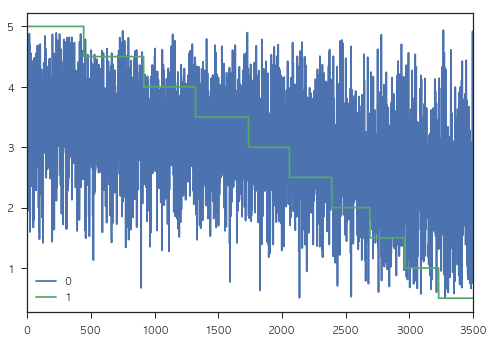

In [352]:
r_df.reset_index(drop=True).plot()

In [297]:
from sklearn.ensemble import RandomForestRegressor

In [302]:
forest = RandomForestRegressor(200)

forest.fit(X=train_x, y=train_y) # 학습데이터 정의하기

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [303]:
pred =forest.predict(test_x)
true = test_y

np.mean(np.abs(true-pred))

1.0596430780237365

In [305]:
np.mean(np.abs((true-pred)/pred))

0.39335531714717